In [1]:
from konlpy.tag import Okt

In [2]:
from konlpy.corpus import kolaw

kolaw_text = kolaw.open('related_coin.txt').read()

In [3]:
from collections import Counter

nouns_tagger = Okt()
nouns_list = nouns_tagger.nouns(kolaw_text)
coin_container = Counter(nouns_list)

545
[('화폐', 48), ('암호', 46), ('거래소', 35), ('비트코인', 30), ('신고', 23), ('코인', 23)]


In [4]:
coin_container2 = Counter({ x : coin_container[x] for x in coin_container if len(x) > 1})

471
[('화폐', 48), ('암호', 46), ('거래소', 35), ('비트코인', 30), ('신고', 23), ('코인', 23)]


In [6]:
kr_stopwords = "kr_stopwords.txt"

with open(kr_stopwords, encoding='utf8') as f:
    coin_list = f.readlines()
stopword_list = [x.strip() for x in coin_list]

no of stopwords = 675


In [13]:
dup_word = [x for x in stopword_list if x in coin_container2]
dup_word2 = list(set(dup_word))

457


In [53]:
coin_container2 = Counter({x:coin_container2[x] for x in coin_container2 if x not in stopword_list})
coin_stopwords = ['에이','지난','실명','최근']

for w in coin_stopwords:
    stopword_list.append(w)

453
453


In [44]:
import pytagcloud

In [45]:
ranked_tags = coin_container2.most_common(20)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=60)

In [46]:
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), 
                            fontname='NanumGothic', rectangular=False)

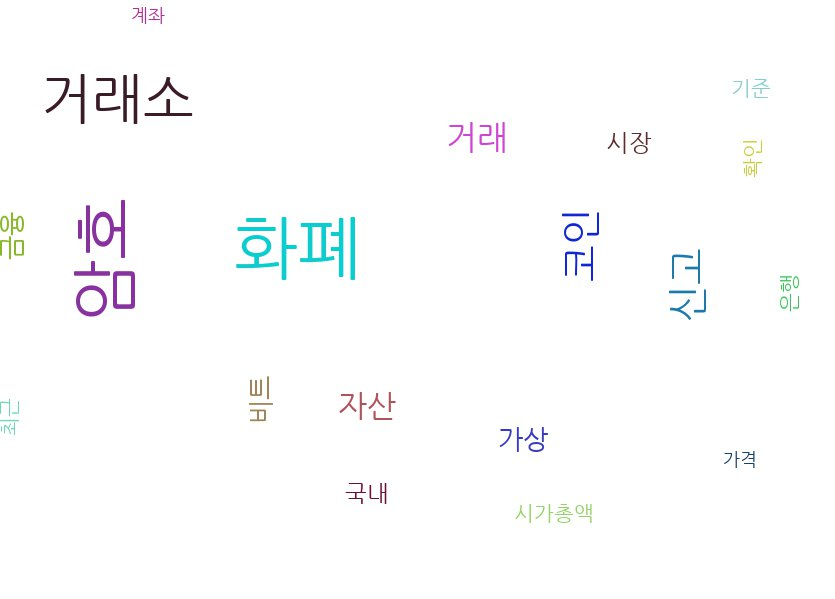

In [54]:
from IPython.display import Image

Image(filename='wordcloud.jpg')

In [55]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [56]:
from nltk import FreqDist

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '화폐'),
  Text(1, 0, '암호'),
  Text(2, 0, '거래소'),
  Text(3, 0, '비트코인'),
  Text(4, 0, '신고'),
  Text(5, 0, '코인'),
  Text(6, 0, '거래'),
  Text(7, 0, '자산'),
  Text(8, 0, '가상'),
  Text(9, 0, '금융'),
  Text(10, 0, '비트'),
  Text(11, 0, '시장'),
  Text(12, 0, '국내'),
  Text(13, 0, '확인'),
  Text(14, 0, '시가총액'),
  Text(15, 0, '기준'),
  Text(16, 0, '은행'),
  Text(17, 0, '계좌'),
  Text(18, 0, '가격'),
  Text(19, 0, '돌파')])

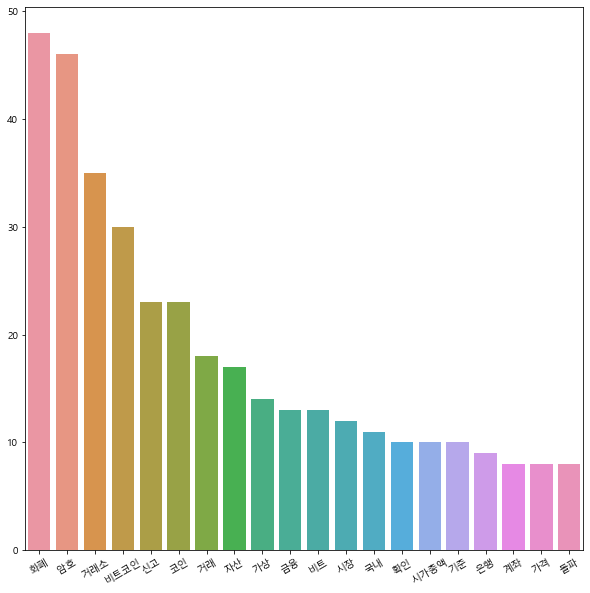

In [59]:
import pandas as pd
import seaborn as sns


fdist = FreqDist(nlist2).most_common(20)


fdist = pd.Series(dict(fdist))
                       
fig, ax = plt.subplots(figsize=(10,10))

all_plot = sns.barplot(x=fdist.index, y=fdist.values, ax=ax)
plt.xticks(rotation=30) 

코인을 다른 말로 암호화폐라고 통칭하기 때문에 화폐와 암호가 가장 빈도수가 많이 나왔다. 그 다음으로는 최근 거래소 등록과 관련한 기사의 첨부와 코인을 거래하는 공간이 거래소 이기때문에 '거래소'가 다음으로 많이 나왔고 코인중에 가장 큰 유통시장을 가진 '비트코인' 이라는 종목이 다음 순위를 차지한 것으로 생각된다. 이후로는 '코인' 이란것도 주식과 비슷한 종류이기 때문에 거래와 자산, 금융, 시가총액 등 주식 거래와 관련된 용어가 줄줄이 순위를 이어간다고 생각한다.'에이다' 와 관련한 기사도 스크랩을 하였는데 에이다의 '~다'가 끝맺음말로 처리가 되었기 때문에 표시에서 '에이'라고 결과가 나와버렸다. 이 부분에 대해서는 '에이'를 불용어로 직접 추가하여 없애 주었다. 이를 포함한다면 '에이다' 라는 단어가 포함되어 있었다면 돌파나 가격이 순위가 뒤로 밀렸을 것이라 생각한다.
